In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os

In [2]:
kmin=0.05
kmax=0.2
grid = 128

#theta = np.linspace(0, np.pi, 50)

k_range = np.linspace(kmin, kmax, 50)
k_range = k_range * 0.2
print(k_range)

[0.01       0.01061224 0.01122449 0.01183673 0.01244898 0.01306122
 0.01367347 0.01428571 0.01489796 0.0155102  0.01612245 0.01673469
 0.01734694 0.01795918 0.01857143 0.01918367 0.01979592 0.02040816
 0.02102041 0.02163265 0.0222449  0.02285714 0.02346939 0.02408163
 0.02469388 0.02530612 0.02591837 0.02653061 0.02714286 0.0277551
 0.02836735 0.02897959 0.02959184 0.03020408 0.03081633 0.03142857
 0.03204082 0.03265306 0.03326531 0.03387755 0.0344898  0.03510204
 0.03571429 0.03632653 0.03693878 0.03755102 0.03816327 0.03877551
 0.03938776 0.04      ]


# read in

In [3]:

# Define the path where the CSV files are stored
df_path = '/home/gremlin/Msc Project/Bk_tables/redshift_space_new/squeezed/'

# Define the file name you want to read
file_name = 'Bk3.csv'  # Replace 'Bk.csv' with the actual file name if different

# Construct the full file path
file_path = os.path.join(df_path, file_name)

if os.path.exists(file_path):
    # Load the CSV into a DataFrame
    df = pd.read_csv(file_path)
    print("Loaded DataFrame:\n", df)

Loaded DataFrame:
               Bk          Bk_2          Bk_3          Bk_4          Bk_5  \
0   1.898017e+09  1.248262e+09  2.266291e+08  6.387180e+08  1.508961e+09   
1   1.034994e+09  9.621014e+08  9.382613e+08  9.995096e+08  1.718201e+09   
2   1.478719e+09  4.311884e+08  8.872927e+08  8.321607e+08  1.682272e+09   
3   1.584062e+09  7.644017e+08  1.111032e+09  8.346147e+08  1.670437e+09   
4   1.131257e+09  1.309144e+09  1.175936e+09  8.833597e+08  1.015429e+09   
5   1.220354e+09  1.133774e+09  9.578937e+08  1.063904e+09  1.035358e+09   
6   8.622633e+08  1.010701e+09  7.644717e+08  8.956660e+08  7.847637e+08   
7   6.729931e+08  9.713369e+08  7.932667e+08  1.179345e+09  1.186465e+09   
8   6.849337e+08  8.812681e+08  7.849656e+08  8.239413e+08  1.238101e+09   
9   3.554701e+08  8.042100e+08  3.824072e+08  1.054565e+09  1.072592e+09   
10  4.904447e+08  6.651025e+08  6.269935e+08  1.008484e+09  4.588344e+08   
11  6.069737e+08  4.332847e+08  8.233300e+08  6.865549e+08  4.540700e

Raw Bk v theta

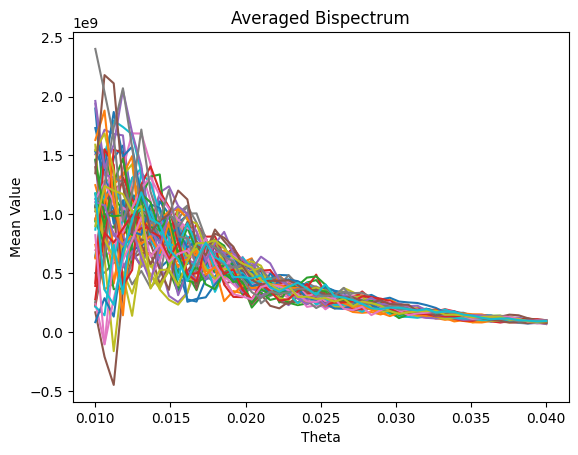

In [4]:

plt.plot(k_range,df)
plt.title('Averaged Bispectrum')
plt.xlabel('Theta')
plt.ylabel('Mean Value')
plt.show()

In [31]:
#read in real space
# Define the path where the CSV files are stored
df_path = '/home/gremlin/Msc Project/Bk_tables/redshift_space_new/squeezed/'

# Define the file name you want to read
file_name = 'Bk_real2.csv'  # Replace 'Bk.csv' with the actual file name if different

# Construct the full file path
file_path = os.path.join(df_path, file_name)

if os.path.exists(file_path):
    # Load the CSV into a DataFrame
    df_real = pd.read_csv(file_path)
    print("Loaded DataFrame:\n", df_real)


Loaded DataFrame:
               Bk          Bk_2          Bk_3          Bk_4          Bk_5  \
0   7.314654e+07  8.105916e+07  7.915214e+07  7.386543e+07  8.025999e+07   
1   7.040443e+07  7.991960e+07  7.463179e+07  7.313630e+07  7.474872e+07   
2   7.524438e+07  8.104629e+07  7.758355e+07  7.479367e+07  7.553175e+07   
3   7.061635e+07  7.870681e+07  7.511158e+07  6.915125e+07  7.245544e+07   
4   5.796412e+07  6.386568e+07  7.023591e+07  6.360326e+07  6.770806e+07   
5   6.352319e+07  6.216157e+07  5.641601e+07  6.006007e+07  6.802028e+07   
6   6.603094e+07  6.301178e+07  6.311948e+07  5.844388e+07  6.010592e+07   
7   6.380718e+07  6.299465e+07  6.744543e+07  6.298449e+07  6.190388e+07   
8   5.844385e+07  5.625534e+07  5.494863e+07  5.678475e+07  6.158973e+07   
9   5.542499e+07  5.330093e+07  5.082045e+07  5.286848e+07  5.933831e+07   
10  5.555090e+07  5.119072e+07  5.787368e+07  4.841143e+07  5.036659e+07   
11  5.534552e+07  5.403533e+07  5.621476e+07  4.514060e+07  4.957847e

# Avg Bk

In [5]:
# Calculate the row means
avg = df.mean(axis=1)
avg_df = avg.to_frame(name='Average')  # Convert Series to DataFrame

# calc row std
std = df.std(axis=1)
avg_df['Standard Deviation'] = std

# Generate theta values
#theta = np.linspace(0, np.pi, 100)  # Ensure the length matches the number of rows

# Add the theta column to the DataFrame
avg_df['k'] = np.array(k_range)


# Display the final DataFrame
print(avg_df)

#save into csv
folder_path = '/home/gremlin/Msc Project/Bk_tables/redshift_space_new/squeezed/'
file_name = 'Bk_avg3.csv'

avg_df.to_csv(folder_path + file_name)




         Average  Standard Deviation         k
0   1.020847e+09        5.427572e+08  0.010000
1   1.021339e+09        5.222954e+08  0.010612
2   1.000827e+09        5.199064e+08  0.011224
3   9.688250e+08        4.509205e+08  0.011837
4   9.791134e+08        3.485687e+08  0.012449
5   9.926268e+08        2.836349e+08  0.013061
6   8.669459e+08        2.553615e+08  0.013673
7   8.038268e+08        2.257951e+08  0.014286
8   7.775496e+08        2.096042e+08  0.014898
9   7.347610e+08        2.406055e+08  0.015510
10  7.032005e+08        2.238997e+08  0.016122
11  6.482759e+08        1.692720e+08  0.016735
12  6.350764e+08        1.159557e+08  0.017347
13  6.193683e+08        1.276753e+08  0.017959
14  5.723254e+08        1.090161e+08  0.018571
15  5.289769e+08        1.023650e+08  0.019184
16  4.807429e+08        8.950844e+07  0.019796
17  4.481268e+08        1.031468e+08  0.020408
18  4.251506e+08        7.818135e+07  0.021020
19  3.989599e+08        6.547819e+07  0.021633
20  3.725170e

In [ ]:
plt.errorbar(avg_df['k'], avg_df['Average'],yerr=avg_df['Standard Deviation'], marker='', linestyle='-')
plt.title('Averaged Bispectrum - Equilateral triangle')
plt.xlabel('k')
plt.ylabel('b(k)')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [37]:
#average real space
# Calculate the row means
avg_real = df_real.mean(axis=1)
std_real = df_real.std(axis=1)


avg_df['Average real'] = avg_real
avg_df['Std real'] = std_real



# Display the final DataFrame
print(avg_df)

#save into csv
folder_path = '/home/gremlin/Msc Project/Bk_tables/redshift_space_new/squeezed/'
file_name = 'Bk_avg2.csv'

avg_df.to_csv(folder_path + file_name)

         Average  Standard Deviation         k  Average real      Std real
0   8.744162e+07        7.904331e+06  0.040000  7.776576e+07  6.708621e+06
1   8.269031e+07        7.813724e+06  0.040816  7.452262e+07  7.081467e+06
2   7.934646e+07        7.690231e+06  0.041633  7.232050e+07  6.603851e+06
3   7.567299e+07        8.167521e+06  0.042449  7.034057e+07  7.389926e+06
4   6.913771e+07        6.868870e+06  0.043265  6.540707e+07  6.715469e+06
5   6.509334e+07        6.738950e+06  0.044082  6.242049e+07  6.535845e+06
6   6.189277e+07        6.730223e+06  0.044898  6.101376e+07  5.961147e+06
7   5.925599e+07        6.039365e+06  0.045714  5.915387e+07  5.336855e+06
8   5.703406e+07        5.212838e+06  0.046531  5.786218e+07  5.190376e+06
9   5.418988e+07        4.330192e+06  0.047347  5.596780e+07  4.716147e+06
10  5.156810e+07        4.309018e+06  0.048163  5.383776e+07  3.842354e+06
11  4.850710e+07        4.010221e+06  0.048980  5.148360e+07  4.168181e+06
12  4.682190e+07        4

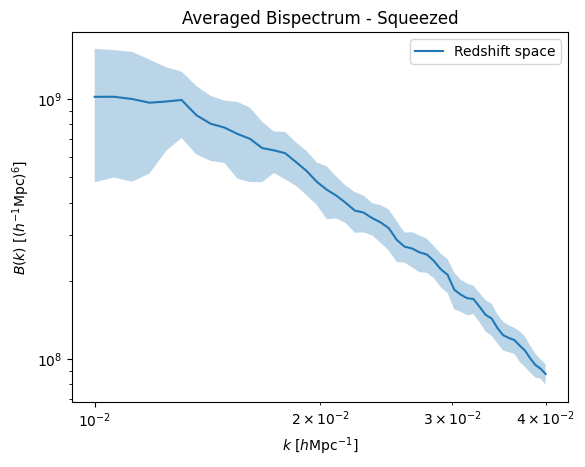

In [6]:
# Plot the average line for Redshift space
plt.plot(avg_df['k'], avg_df['Average'], linestyle='-', label='Redshift space')

# Shaded region for the error in Redshift space
plt.fill_between(avg_df['k'], 
                 avg_df['Average'] - avg_df['Standard Deviation'], 
                 avg_df['Average'] + avg_df['Standard Deviation'], alpha=0.3)

# # Plot the average line for Real space
# plt.plot(avg_df['k'], avg_df['Average real'], linestyle='-', label='Real space')

# # Shaded region for the error in Real space
# plt.fill_between(avg_df['k'], 
#                  avg_df['Average real'] - avg_df['Std real'], 
#                  avg_df['Average real'] + avg_df['Std real'],  alpha=0.3)

# Set the title and axis labels
plt.title('Averaged Bispectrum - Squeezed')
plt.xlabel(r'$k~[h{\rm Mpc}^{-1}]$')
plt.ylabel(r'$B(k)~[(h^{-1}{\rm Mpc})^6]$')

# Set the scales to logarithmic
plt.xscale('log')
plt.yscale('log')

# Show the legend and the plot
plt.legend()
plt.show()

# read in the theory bk

In [14]:


# file_path = '/home/gremlin/Msc Project/Bk_tables/redshift_space/theory/'
# file_name = f'theory_equal.h5'

# # Load DataFrame and metadata from HDF5
# with pd.HDFStore(file_path + file_name) as store:
#     theory_df = store['theory_df']
#     metadata = store.get_storer('theory_df').attrs.metadata

# # Attach metadata to DataFrame
# theory_df.attrs = metadata

# # Verify metadata
# print(theory_df)
# print(theory_df.attrs['k1'])
# print(theory_df.attrs['k2'])

              Bk     Theta
0   3.689882e+09  0.000000
1   3.688193e+09  0.031733
2   3.683132e+09  0.063467
3   3.674715e+09  0.095200
4   3.662969e+09  0.126933
..           ...       ...
95  6.019788e+09  3.014660
96  6.132417e+09  3.046393
97  6.214942e+09  3.078126
98  6.265786e+09  3.109859
99  6.282910e+09  3.141593

[100 rows x 2 columns]
0.08
0.04


In [3]:
#LOAD IN ALREADY AVERAED Bk

df_path = '/home/gremlin/Msc Project/Bk_tables/redshift_space_new/squeezed/'
file_name = 'Bk_avg3.csv'


# Construct the full file path
file_path = os.path.join(df_path, file_name)

if os.path.exists(file_path):
    # Load the CSV into a DataFrame
    avg_df = pd.read_csv(file_path)
    print("Loaded DataFrame:\n", avg_df)

Loaded DataFrame:
     Unnamed: 0       Average  Standard Deviation         k  Average real  \
0            0  1.020847e+09        5.427572e+08  0.010000  5.655558e+08   
1            1  1.021339e+09        5.222954e+08  0.010612  5.704063e+08   
2            2  1.000827e+09        5.199064e+08  0.011224  5.569294e+08   
3            3  9.688250e+08        4.509205e+08  0.011837  5.416799e+08   
4            4  9.791134e+08        3.485687e+08  0.012449  5.418337e+08   
5            5  9.926268e+08        2.836349e+08  0.013061  5.728677e+08   
6            6  8.669459e+08        2.553615e+08  0.013673  5.069785e+08   
7            7  8.038268e+08        2.257951e+08  0.014286  4.658070e+08   
8            8  7.775496e+08        2.096042e+08  0.014898  4.512876e+08   
9            9  7.347610e+08        2.406055e+08  0.015510  4.349091e+08   
10          10  7.032005e+08        2.238997e+08  0.016122  4.200039e+08   
11          11  6.482759e+08        1.692720e+08  0.016735  3.824829e

In [4]:
# Define the path where the CSV files are stored
df_path = '/home/gremlin/Msc Project/Bk_tables/theory/sigma/'

# Define the file name you want to read
file_name = 'Theory_squeezed_0.08_0.16.csv'  # Replace 'Bk.csv' with the actual file name if different

# Construct the full file path
file_path = os.path.join(df_path, file_name)

if os.path.exists(file_path):
    # Load the CSV into a DataFrame
    theory_df = pd.read_csv(file_path)
    print("Loaded DataFrame:\n", theory_df)

Loaded DataFrame:
     Unnamed: 0        k3     Theta  Bk_norm_sigma5  Bk_norm_sigma4  \
0            0  0.010000  2.941258    9.324624e+08    3.334872e+09   
1            1  0.010612  2.941258    9.083541e+08    3.252232e+09   
2            2  0.011224  2.941258    8.872011e+08    3.180196e+09   
3            3  0.011837  2.941258    8.673645e+08    3.112902e+09   
4            4  0.012449  2.941258    8.471029e+08    3.044095e+09   
5            5  0.013061  2.941258    8.248459e+08    2.968104e+09   
6            6  0.013673  2.941258    7.994138e+08    2.880633e+09   
7            7  0.014286  2.941258    7.700939e+08    2.779043e+09   
8            8  0.014898  2.941258    7.368751e+08    2.663212e+09   
9            9  0.015510  2.941258    7.001730e+08    2.534558e+09   
10          10  0.016122  2.941258    6.608790e+08    2.396228e+09   
11          11  0.016735  2.941258    6.202141e+08    2.252584e+09   
12          12  0.017347  2.941258    5.795095e+08    2.108418e+09   
1

note:

- avg_df : 50 Qsims avergae
- df: theory df

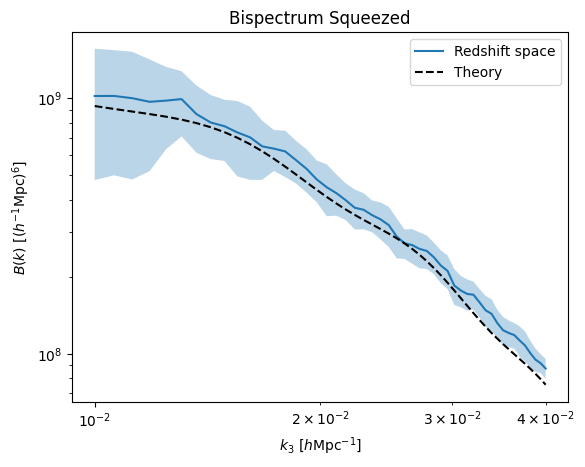

In [7]:
#plt.plot(avg_df['Theta'], avg_df['Average'], marker='', linestyle='-', color='b')
#Title = 'Bispectrum fixed' + r' $ k_1 = $ ' + str(k1) + r' $ k_2 = $' + str(k2)
#file_path = '/home/gremlin/Msc Project/plots/fin/'
#file_name = f'Averaged_Bispectrum_{grid}_k1_{k1}_k2_{k2}.png'

Title = 'Bispectrum Squeezed'

sigma =5


# Plot the average line for Redshift space
plt.plot(avg_df['k'], avg_df['Average'], linestyle='-', label='Redshift space')

# Shaded region for the error in Redshift space
plt.fill_between(avg_df['k'], 
                 avg_df['Average'] - avg_df['Standard Deviation'], 
                 avg_df['Average'] + avg_df['Standard Deviation'], alpha=0.3)

# # Plot the average line for Real space
# plt.plot(avg_df['k'], avg_df['Average real'], linestyle='-', label='Real space')

# # Shaded region for the error in Real space
# plt.fill_between(avg_df['k'], 
#                  avg_df['Average real'] - avg_df['Std real'], 
#                  avg_df['Average real'] + avg_df['Std real'],  alpha=0.3)


#plt.figtext(0.8, 0.68, f'$\sigma = {sigma}$')


plt.plot(theory_df['k3'], theory_df['Bk_norm'], marker='', linestyle='--', color='black', label='Theory')
plt.title(Title)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k_3~[h{\rm Mpc}^{-1}]$')
plt.ylabel(r'$B(k)~[(h^{-1}{\rm Mpc})^6]$')  # Adjust units if necessary
plt.legend()
#plt.savefig(file_path + file_name)
plt.show()

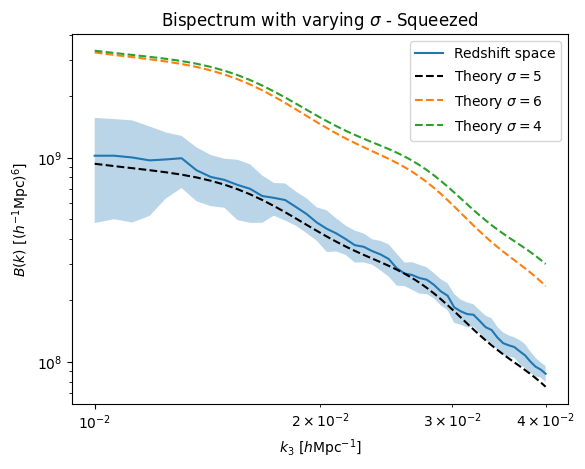

In [5]:

Title = f'Bispectrum with varying $\sigma$ - Squeezed '




# Plot the average line for Redshift space
plt.plot(avg_df['k'], avg_df['Average'], linestyle='-', label='Redshift space')

# Shaded region for the error in Redshift space
plt.fill_between(avg_df['k'], 
                 avg_df['Average'] - avg_df['Standard Deviation'], 
                 avg_df['Average'] + avg_df['Standard Deviation'], alpha=0.3)

# # Plot the average line for Real space
# plt.plot(avg_df['k'], avg_df['Average real'], linestyle='-', label='Real space')

# # Shaded region for the error in Real space
# plt.fill_between(avg_df['k'], 
#                  avg_df['Average real'] - avg_df['Std real'], 
#                  avg_df['Average real'] + avg_df['Std real'],  alpha=0.3)




plt.plot(theory_df['k3'], theory_df['Bk_norm_sigma5'], marker='', linestyle='--', color='black', label=f'Theory $\sigma = 5$')
plt.plot(theory_df['k3'], theory_df['Bk_norm_sigma6'], marker='', linestyle='--', label=f'Theory $\sigma = 6$')
plt.plot(theory_df['k3'], theory_df['Bk_norm_sigma4'], marker='', linestyle='--', label=f'Theory $\sigma = 4$')


plt.title(Title)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k_3~[h{\rm Mpc}^{-1}]$')
plt.ylabel(r'$B(k)~[(h^{-1}{\rm Mpc})^6]$')  # Adjust units if necessary
plt.legend()
#plt.savefig(file_path + file_name)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

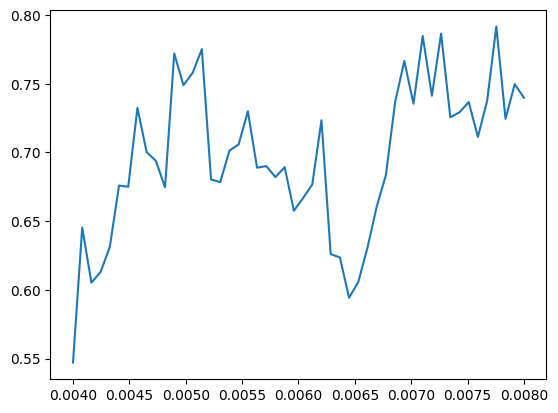

In [12]:
x = avg_df['Average'] / theory_df['Bk_norm']

plt.plot(avg_df['k'], 1/x)
plt.show

# Data analysis

In [11]:
observed_avg = avg_df['Average']
expected = theory_df['Bk_norm_sigma5']
std = avg_df['Standard Deviation']

#print(observed_avg)
# print(expected)
# print(std)

chi = ((observed_avg - expected)**2)/((std/np.sqrt(len(observed_avg)))**2)
#chi = ((observed_avg - expected)**2)/((std)**2)

sum_chi = sum(chi)

dof = len(observed_avg)

print("---------------")
print(sum_chi)

print(sum_chi/dof)

---------------
1341.0864119532978
26.821728239065955


SNR = 0      1.880854
1      1.955481
2      1.925015
3      2.148550
4      2.808954
5      3.499664
6      3.394975
7      3.559983
8      3.709609
9      3.053800
10     3.140695
11     3.829789
12     5.476891
13     4.851121
14     5.249917
15     5.167558
16     5.370923
17     4.344553
18     5.438006
19     6.093020
20     5.615774
21     6.180646
22     7.016548
23     6.039704
24     5.573918
25     5.590321
26     7.551865
27     6.468392
28     6.206342
29     6.663317
30     7.083394
31     6.793012
32     6.650564
33     6.204496
34     7.105130
35     7.128802
36     7.951969
37     7.806339
38     7.198471
39     7.101833
40     7.840026
41     7.834311
42     8.377326
43     8.756894
44     7.394831
45     7.458707
46     8.392888
47     9.440410
48    11.787194
49    11.062495
dtype: float64


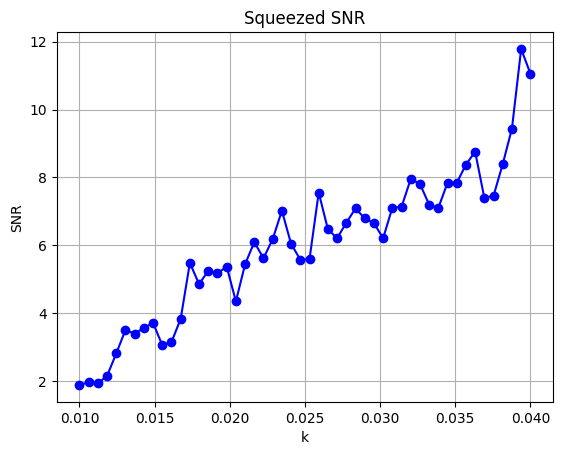

In [13]:
#SNR test

snr = avg_df['Average']/avg_df['Standard Deviation']

print(f'SNR = {snr}')

# Assuming 'snr' is a pandas Series with SNR values for each bin
#plt.figure(figsize=(10, 6))
plt.plot(avg_df['k'],snr, marker='o', linestyle='-', color='b')
plt.title('Squeezed SNR')
plt.xlabel(r'k')
plt.ylabel('SNR')
plt.grid(True)
plt.show()

In [14]:
# Calculate the sum in quadrature
snr_total = np.sqrt(np.sum(snr**2))

# Print the result
print("Total SNR (sum in quadrature):", snr_total)

Total SNR (sum in quadrature): 45.13406364760994
